<a href="https://colab.research.google.com/github/Luchonrex/Alura_Desafio_2-/blob/main/Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

#📌 Extracción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

¿Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

Este es el primer paso para transformar los datos en información valiosa. ¿Listo para programar? 🚀

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [ ]:
#Primero: para poder acceder y comunicarnos con nuestros datos tenemos que importar una biblioteca pandas
import pandas as pd

In [ ]:
# como importamos a una variable de python el archivo datos TelecomX_Data
datos_TelcomX = pd.read_json('/content/TelecomX_Data.json')
datos_TelcomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Exploramos las columnas y sus tipos de datos
datos_TelcomX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
from pandas import json_normalize

In [ ]:
# Normalizar la columna 'customer'
customer_df = json_normalize(datos_TelcomX['customer'])
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
# Normalizar la columna 'phone'
phone_df = json_normalize(datos_TelcomX['phone'])
phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
# Normalizar la columna 'internet'
internet_df = json_normalize(datos_TelcomX['internet'])
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
# Normalizar la columna 'account'
account_df = json_normalize(datos_TelcomX['account'])
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Concatenar los DataFrames normalizados con las columnas originales que no son objetos
datos_normalizados = pd.concat([datos_TelcomX[['customerID', 'Churn']],customer_df,phone_df,internet_df,account_df], axis=1)
datos_normalizados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Reviso el número de filas y columnas usando .shape
print("\nDimensiones del DataFrame (filas, columnas):")
datos_normalizados.shape


Dimensiones del DataFrame (filas, columnas):


(7267, 21)

## **Comprobación de incoherencias en los datos**

Descripción

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:

🔗 Documentación de pandas.unique()
🔗 Documentación de pandas.Series.dt.normalize()

In [ ]:
#revisamos cada fila usando pandas.unique()

# Revisamos los valores únicos en algunas columnas categóricas
print("Valores únicos en la columna 'Churn':", datos_normalizados['Churn'].unique())
print("Valores únicos en la columna 'gender':", datos_normalizados['gender'].unique())
print("Valores únicos en la columna 'SeniorCitizen':", datos_normalizados['SeniorCitizen'].unique())
print("Valores únicos en la columna 'Partner':", datos_normalizados['Partner'].unique())
print("Valores únicos en la columna 'Dependents':", datos_normalizados['Dependents'].unique())
print("Valores únicos en la columna 'PhoneService':", datos_normalizados['PhoneService'].unique())
print("Valores únicos en la columna 'MultipleLines':", datos_normalizados['MultipleLines'].unique())
print("Valores únicos en la columna 'InternetService':", datos_normalizados['InternetService'].unique())
print("Valores únicos en la columna 'OnlineSecurity':", datos_normalizados['OnlineSecurity'].unique())
print("Valores únicos en la columna 'OnlineBackup':", datos_normalizados['OnlineBackup'].unique())
print("Valores únicos en la columna 'DeviceProtection':", datos_normalizados['DeviceProtection'].unique())
print("Valores únicos en la columna 'TechSupport':", datos_normalizados['TechSupport'].unique())
print("Valores únicos en la columna 'StreamingTV':", datos_normalizados['StreamingTV'].unique())
print("Valores únicos en la columna 'StreamingMovies':", datos_normalizados['StreamingMovies'].unique())
print("Valores únicos en la columna 'Contract':", datos_normalizados['Contract'].unique())
print("Valores únicos en la columna 'PaperlessBilling':", datos_normalizados['PaperlessBilling'].unique())
print("Valores únicos en la columna 'PaymentMethod':", datos_normalizados['PaymentMethod'].unique())


Valores únicos en la columna 'Churn': ['No' 'Yes' '']
Valores únicos en la columna 'gender': ['Female' 'Male']
Valores únicos en la columna 'SeniorCitizen': [0 1]
Valores únicos en la columna 'Partner': ['Yes' 'No']
Valores únicos en la columna 'Dependents': ['Yes' 'No']
Valores únicos en la columna 'PhoneService': ['Yes' 'No']
Valores únicos en la columna 'MultipleLines': ['No' 'Yes' 'No phone service']
Valores únicos en la columna 'InternetService': ['DSL' 'Fiber optic' 'No']
Valores únicos en la columna 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'OnlineBackup': ['Yes' 'No' 'No internet service']
Valores únicos en la columna 'DeviceProtection': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'TechSupport': ['Yes' 'No' 'No internet service']
Valores únicos en la columna 'StreamingTV': ['Yes' 'No' 'No internet service']
Valores únicos en la columna 'StreamingMovies': ['No' 'Yes' 'No internet service']
Valores únicos en la columna '

In [ ]:
# revisando el total de valores nulos por columna.
print("Cantidad de valores nulos por columna en datos_normalizados:")
print(datos_normalizados.isnull().sum())


Cantidad de valores nulos por columna en datos_normalizados:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


## **Conoce el conjunto de datos**

Descripción

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## **Manejo de inconsistencias**

Descripción

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

📌 Tips:

🔗 Manipulación de strings en pandas: lower, replace, startswith y contains

In [ ]:
#Quitamos los guiones de la columna customerID
datos_normalizados['customerID'] = datos_normalizados['customerID'].str.replace('-', '', regex=False)
#Imprimimos las primeras filas para verificar el cambio
print(datos_normalizados[['customerID']].head())


  customerID
0  0002ORFBO
1  0003MKNFE
2  0004TLHLJ
3  0011IGKFF
4  0013EXCHZ


In [ ]:
# Quitamos los guiones de la columnaContract
datos_normalizados['Contract'] = datos_normalizados['Contract'].str.replace('-', '', regex=False)
# Imprimimos los valores únicos para comprobar el cambio
print(datos_normalizados['Contract'].unique())


['One year' 'Monthtomonth' 'Two year']


In [ ]:
# Quitamos los paréntesis de la columna PaymentMethod
datos_normalizados['PaymentMethod'] = datos_normalizados['PaymentMethod'].str.replace('(', '', regex=False).str.replace(')', '', regex=False)

# Imprimimos los valores únicos para comprobar el cambio
print(datos_normalizados['PaymentMethod'].unique())

['Mailed check' 'Electronic check' 'Credit card automatic'
 'Bank transfer automatic']


In [ ]:
#convertir a minúsculas los valores de las columnas del Data Frame
for col in datos_normalizados.columns[1:]:
  if datos_normalizados[col].dtype == 'object':
    datos_normalizados[col] = datos_normalizados[col].str.lower()

In [ ]:
datos_normalizados.head(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.3
1,0003MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,monthtomonth,no,mailed check,59.90,542.4
2,0004TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,monthtomonth,yes,electronic check,73.90,280.85
3,0011IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,monthtomonth,yes,electronic check,98.00,1237.85
4,0013EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,monthtomonth,yes,mailed check,83.90,267.4
5,0013MHZWF,no,female,0,no,yes,9,yes,no,dsl,...,no,no,yes,yes,yes,monthtomonth,yes,credit card automatic,69.40,571.45
6,0013SMEOE,no,female,1,yes,no,71,yes,no,fiber optic,...,yes,yes,yes,yes,yes,two year,yes,bank transfer automatic,109.70,7904.25
7,0014BMAQU,no,male,0,yes,no,63,yes,yes,fiber optic,...,no,no,yes,no,no,two year,yes,credit card automatic,84.65,5377.8
8,0015UOCOJ,no,female,1,no,no,7,yes,no,dsl,...,no,no,no,no,no,monthtomonth,yes,electronic check,48.20,340.35
9,0016QLJIS,no,female,0,yes,yes,65,yes,yes,dsl,...,yes,yes,yes,yes,yes,two year,yes,mailed check,90.45,5957.9


#🔧 Transformación

## **Columna de cuentas diarias**

Descripción

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [ ]:
#Calculo de promedio valor por dia
datos_normalizados['Cuentas_Diarias'] = datos_normalizados['Charges.Monthly'] / 30.44 #promedio de dias del mes
datos_normalizados.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.3,2.155059
1,0003MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,monthtomonth,no,mailed check,59.9,542.4,1.967806
2,0004TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,monthtomonth,yes,electronic check,73.9,280.85,2.427727
3,0011IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,monthtomonth,yes,electronic check,98.0,1237.85,3.219448
4,0013EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,monthtomonth,yes,mailed check,83.9,267.4,2.756242


## **Estandarización y transformación de datos (opcional)**

Descripción

La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [ ]:
#Traducimos los encabezados de las columnas
# Creamos un diccionario con los nombres originales de las columnas y sus traduccion al español
encabezados_traducidos = {
    'customerID': 'ID_Cliente',
    'Churn': 'Dejo_el_servicio',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Tiempo_Servicio',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Copia_Seguridad_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'Cuentas_Diarias': 'Cuentas_Diarias' # Agregamos la columna que creamos anteriormente
}

# Renombramos las columnas del DataFrame usando las traducciones
datos_normalizados.rename(columns=encabezados_traducidos, inplace=True)

# Mostramos las primeras filas para verificar el cambio de nombres
datos_normalizados.head()

,ID_Cliente,Dejo_el_servicio,Genero,Ciudadano_Mayor,Pareja,Dependientes,Tiempo_Servicio,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.3,2.155059
1,0003MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,monthtomonth,no,mailed check,59.9,542.4,1.967806
2,0004TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,monthtomonth,yes,electronic check,73.9,280.85,2.427727
3,0011IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,monthtomonth,yes,electronic check,98.0,1237.85,3.219448
4,0013EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,monthtomonth,yes,mailed check,83.9,267.4,2.756242


In [ ]:
# Traducimos los valores dentro de las columnas categóricas o cambiamos por 1 y 0
# Diccionario para la columna 'Dejo_el_servicio'
traduccion_churn = {'yes': 1,
                     'no': 0}
datos_normalizados['Dejo_el_servicio'] = datos_normalizados['Dejo_el_servicio'].replace(traduccion_churn)

# Diccionario para la columna 'Genero'
traduccion_genero = {'female': 'f',
                       'male': 'm'}
datos_normalizados['Genero'] = datos_normalizados['Genero'].replace(traduccion_genero)

# Diccionario para la columna 'Pareja'
traduccion_pareja = {'yes': 1,
                      'no': 0}
datos_normalizados['Pareja'] = datos_normalizados['Pareja'].replace(traduccion_pareja)

# Diccionario para la columna 'Dependientes'
traduccion_dependientes = {'yes': 1,
                            'no': 0}
datos_normalizados['Dependientes'] = datos_normalizados['Dependientes'].replace(traduccion_dependientes)

# Diccionario para la columna 'Servicio_Telefonico'
traduccion_servicio_telefonico = {'yes': 1,
                                   'no': 0}
datos_normalizados['Servicio_Telefonico'] = datos_normalizados['Servicio_Telefonico'].replace(traduccion_servicio_telefonico)

# Diccionario para la columna 'Multiples_Lineas'
traduccion_multiples_lineas = {'yes': 'si',
                                'no': 'no',
                  'no phone service': 'nst'}
datos_normalizados['Multiples_Lineas'] = datos_normalizados['Multiples_Lineas'].replace(traduccion_multiples_lineas)

# Diccionario para la columna 'Servicio_Internet'
traduccion_servicio_internet = {'dsl': 'dsl',
                        'fiber optic': 'fibra optica',
                                 'no': 'no'
}
datos_normalizados['Servicio_Internet'] = datos_normalizados['Servicio_Internet'].replace(traduccion_servicio_internet)

# Diccionario para la columna 'Seguridad_Online'
traduccion_seguridad_online = {'yes': 'si',
                                'no': 'no',
               'no internet service': 'nsin'}
datos_normalizados['Seguridad_Online'] = datos_normalizados['Seguridad_Online'].replace(traduccion_seguridad_online)

# Diccionario para la columna 'Copia_Seguridad_Online'
traduccion_copia_seguridad_online = {'yes': 'si',
                                      'no': 'no',
                     'no internet service': 'nsin'}
datos_normalizados['Copia_Seguridad_Online'] = datos_normalizados['Copia_Seguridad_Online'].replace(traduccion_copia_seguridad_online)

# Diccionario para la columna 'Proteccion_Dispositivo'
traduccion_proteccion_dispositivo = {'yes': 'si',
                                      'no': 'no',
                     'no internet service': 'nsin'}
datos_normalizados['Proteccion_Dispositivo'] = datos_normalizados['Proteccion_Dispositivo'].replace(traduccion_proteccion_dispositivo)

# Diccionario para la columna 'Soporte_Tecnico'
traduccion_soporte_tecnico = {'yes': 'si',
                               'no': 'no',
             'no internet service': 'nsin'}
datos_normalizados['Soporte_Tecnico'] = datos_normalizados['Soporte_Tecnico'].replace(traduccion_soporte_tecnico)

# Diccionario para la columna 'Streaming_TV'
traduccion_streaming_tv = {'yes': 'si',
                            'no': 'no',
           'no internet service': 'nsin'}
datos_normalizados['Streaming_TV'] = datos_normalizados['Streaming_TV'].replace(traduccion_streaming_tv)

# Diccionario para la columna 'Streaming_Peliculas'
traduccion_streaming_peliculas = {'yes': 'si',
                                   'no': 'no',
                  'no internet service': 'nsin'}
datos_normalizados['Streaming_Peliculas'] = datos_normalizados['Streaming_Peliculas'].replace(traduccion_streaming_peliculas)

# Diccionario para la columna 'Contrato'
traduccion_contrato = {'monthtomonth': 'mes a mes',
                            'one year': 'un ano',
                            'two year': 'dos anos'}
datos_normalizados['Contrato'] = datos_normalizados['Contrato'].replace(traduccion_contrato)

# Diccionario para la columna 'Facturacion_Electronica'
traduccion_facturacion_electronica = {'yes': 1,
                                       'no': 0}
datos_normalizados['Facturacion_Electronica'] = datos_normalizados['Facturacion_Electronica'].replace(traduccion_facturacion_electronica)

# Diccionario para la columna 'Metodo_Pago'
traduccion_metodo_pago = {'electronic check': 'cheque electronico',
                              'mailed check': 'cheque enviado por correo',
                 'bank transfer (automatic)': 'transferencia bancaria (automatica)',
                   'credit card (automatic)': 'tarjeta de credito (automatica)'}
datos_normalizados['Metodo_Pago'] = datos_normalizados['Metodo_Pago'].replace(traduccion_metodo_pago)

# Mostramos las primeras filas para verificar los cambios de valores
datos_normalizados.head(8)


<ipython-input-22-ac5b8aa86adb>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizados['Pareja'] = datos_normalizados['Pareja'].replace(traduccion_pareja)
<ipython-input-22-ac5b8aa86adb>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizados['Dependientes'] = datos_normalizados['Dependientes'].replace(traduccion_dependientes)
<ipython-input-22-ac5b8aa86adb>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly c

,ID_Cliente,Dejo_el_servicio,Genero,Ciudadano_Mayor,Pareja,Dependientes,Tiempo_Servicio,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002ORFBO,0,f,0,1,1,9,1,no,dsl,...,no,si,si,no,un ano,1,cheque enviado por correo,65.60,593.3,2.155059
1,0003MKNFE,0,m,0,0,0,9,1,si,dsl,...,no,no,no,si,mes a mes,0,cheque enviado por correo,59.90,542.4,1.967806
2,0004TLHLJ,1,m,0,0,0,4,1,no,fibra optica,...,si,no,no,no,mes a mes,1,cheque electronico,73.90,280.85,2.427727
3,0011IGKFF,1,m,1,1,0,13,1,no,fibra optica,...,si,no,si,si,mes a mes,1,cheque electronico,98.00,1237.85,3.219448
4,0013EXCHZ,1,f,1,1,0,3,1,no,fibra optica,...,no,si,si,no,mes a mes,1,cheque enviado por correo,83.90,267.4,2.756242
5,0013MHZWF,0,f,0,0,1,9,1,no,dsl,...,no,si,si,si,mes a mes,1,credit card automatic,69.40,571.45,2.279895
6,0013SMEOE,0,f,1,1,0,71,1,no,fibra optica,...,si,si,si,si,dos anos,1,bank transfer automatic,109.70,7904.25,3.603811
7,0014BMAQU,0,m,0,1,0,63,1,si,fibra optica,...,no,si,no,no,dos anos,1,credit card automatic,84.65,5377.8,2.780880


In [ ]:
# Reemplazar espacios vacíos en la columna 'Dejo_el_servicio' con 0
datos_normalizados['Dejo_el_servicio'] = datos_normalizados['Dejo_el_servicio'].replace('', 0)

<ipython-input-23-333e87fcef64>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizados['Dejo_el_servicio'] = datos_normalizados['Dejo_el_servicio'].replace('', 0)


In [ ]:
# prompt: explica en español, a que valos se pueden pasar los espacios vacios en la columna 'Cargos_Totales'

# Reemplazar espacios vacíos en la columna 'Dejo_el_servicio' con 0
datos_normalizados['Dejo_el_servicio'] = datos_normalizados['Dejo_el_servicio'].replace('', 0)


In [ ]:
# revisamos celdas con espacios vacios
# Iteramos sobre cada columna del DataFrame
for col in datos_normalizados.columns:
  # Verificamos si el tipo de dato de la columna es 'object' (comúnmente usado para texto)
  if datos_normalizados[col].dtype == 'object':
    # Para las columnas de texto, contamos cuántas celdas, después de quitar los espacios en blanco
    # al inicio y al final (.str.strip()), quedan vacías ('').
    # Usamos .sum() para obtener el total de True (celdas con solo espacios en blanco)
    count_whitespace = (datos_normalizados[col].str.strip() == '').sum()
    if count_whitespace > 0:
      print(f"  '{col}': {count_whitespace}")


  'Cargos_Totales': 11


In [ ]:
# Lista de columnas a formatear como string
columnas_a_string = ['ID_Cliente','Genero','Multiples_Lineas','Servicio_Internet','Proteccion_Dispositivo','Soporte_Tecnico',
                     'Streaming_TV','Streaming_Peliculas','Contrato','Metodo_Pago']

# Aplicar el formato string a las columnas especificadas
for col in columnas_a_string:
  datos_normalizados[col] = datos_normalizados[col].astype(str)

# Verificar los tipos de datos de las columnas después del formato
print("\nTipos de datos después de formatear a string:")
datos_normalizados[columnas_a_string].dtypes



Tipos de datos después de formatear a string:


,0
ID_Cliente,object
Genero,object
Multiples_Lineas,object
Servicio_Internet,object
Proteccion_Dispositivo,object
Soporte_Tecnico,object
Streaming_TV,object
Streaming_Peliculas,object
Contrato,object
Metodo_Pago,object


In [ ]:
import pandas as pd
# Lista de columnas a formatear como int64
columnas_a_int64 = ['Dejo_el_servicio', 'Ciudadano_Mayor', 'Pareja', 'Dependientes', 'Tiempo_Servicio',
                    'Servicio_Telefonico', 'Facturacion_Electronica']

# Aplicar el formato int64 a las columnas especificadas
for col in columnas_a_int64:
  # Manejamos los posibles errores en la conversión (por ejemplo, si hay valores no numéricos)
  try:
    datos_normalizados[col] = datos_normalizados[col].astype('int64')
  except ValueError as e:
    print(f"No se pudo convertir la columna '{col}' a int64. Error: {e}")
    # Puedes decidir cómo manejar estos errores, por ejemplo, convertir a NaN
    # datos_normalizados[col] = pd.to_numeric(datos_normalizados[col], errors='coerce').astype('int64')


# Verificar los tipos de datos de las columnas después del formato
print("\nTipos de datos después de formatear a int64:")
datos_normalizados[columnas_a_int64].dtypes



Tipos de datos después de formatear a int64:


,0
Dejo_el_servicio,int64
Ciudadano_Mayor,int64
Pareja,int64
Dependientes,int64
Tiempo_Servicio,int64
Servicio_Telefonico,int64
Facturacion_Electronica,int64


In [ ]:
import pandas as pd
# Lista de columnas a formatear como float64
columnas_a_float64 = ['Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']
# Aplicar el formato float64 a las columnas especificadas
for col in columnas_a_float64:
  # Convertir a tipo numérico, forzando los errores (valores no convertibles) a NaN
  datos_normalizados[col] = pd.to_numeric(datos_normalizados[col], errors='coerce')
  # Convertir a float64 si la conversión anterior fue exitosa
  datos_normalizados[col] = datos_normalizados[col].astype('float64')
# Verificar los tipos de datos de las columnas después del formato
print("\nTipos de datos después de formatear a float64:")
datos_normalizados[columnas_a_float64].dtypes



Tipos de datos después de formatear a float64:


,0
Cargos_Mensuales,float64
Cargos_Totales,float64
Cuentas_Diarias,float64


In [ ]:
# Ver el tipo de dato de cada columna
print("\nTipos de datos de cada columna:")
datos_normalizados.dtypes



Tipos de datos de cada columna:


,0
ID_Cliente,object
Dejo_el_servicio,int64
Genero,object
Ciudadano_Mayor,int64
Pareja,int64
Dependientes,int64
Tiempo_Servicio,int64
Servicio_Telefonico,int64
Multiples_Lineas,object
Servicio_Internet,object


In [ ]:
# Identificar las columnas que contienen 1 y 0 y que deben ser convertidas a int64
# Basado en las traducciones que hiciste anteriormente
columnas_a_int = [
    'Dejo_el_servicio',
    'Ciudadano_Mayor', # Esta columna ya era numérica, pero la incluimos por si acaso
    'Pareja',
    'Dependientes',
    'Servicio_Telefonico',
    'Facturacion_Electronica']

# Convertir las columnas identificadas a tipo int64
for col in columnas_a_int:
    # Usamos errors='coerce' para convertir a NaN si hay valores que no se puedan convertir
    # Aunque en este caso, después de tus reemplazos, no debería haber problemas
    datos_normalizados[col] = pd.to_numeric(datos_normalizados[col], errors='coerce').astype('int64')

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos después de convertir 1 y 0 a int64:")
print(datos_normalizados.info())

# Mostrar las primeras filas para verificar los cambios
print("\nPrimeras filas después de la conversión a int64:")
datos_normalizados.head()



Tipos de datos después de convertir 1 y 0 a int64:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7267 non-null   object 
 1   Dejo_el_servicio         7267 non-null   int64  
 2   Genero                   7267 non-null   object 
 3   Ciudadano_Mayor          7267 non-null   int64  
 4   Pareja                   7267 non-null   int64  
 5   Dependientes             7267 non-null   int64  
 6   Tiempo_Servicio          7267 non-null   int64  
 7   Servicio_Telefonico      7267 non-null   int64  
 8   Multiples_Lineas         7267 non-null   object 
 9   Servicio_Internet        7267 non-null   object 
 10  Seguridad_Online         7267 non-null   object 
 11  Copia_Seguridad_Online   7267 non-null   object 
 12  Proteccion_Dispositivo   7267 non-null   object 
 13  Soporte_Tecnico          7

,ID_Cliente,Dejo_el_servicio,Genero,Ciudadano_Mayor,Pareja,Dependientes,Tiempo_Servicio,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Contrato,Facturacion_Electronica,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
0,0002ORFBO,0,f,0,1,1,9,1,no,dsl,...,no,si,si,no,un ano,1,cheque enviado por correo,65.6,593.30,2.155059
1,0003MKNFE,0,m,0,0,0,9,1,si,dsl,...,no,no,no,si,mes a mes,0,cheque enviado por correo,59.9,542.40,1.967806
2,0004TLHLJ,1,m,0,0,0,4,1,no,fibra optica,...,si,no,no,no,mes a mes,1,cheque electronico,73.9,280.85,2.427727
3,0011IGKFF,1,m,1,1,0,13,1,no,fibra optica,...,si,no,si,si,mes a mes,1,cheque electronico,98.0,1237.85,3.219448
4,0013EXCHZ,1,f,1,1,0,3,1,no,fibra optica,...,no,si,si,no,mes a mes,1,cheque enviado por correo,83.9,267.40,2.756242


In [ ]:
# Crear un nuevo DataFrame con las columnas relevantes
df_columnas_rel = datos_normalizados[['ID_Cliente', 'Tiempo_Servicio', 'Cargos_Mensuales', 'Cargos_Totales', 'Contrato', 'Servicio_Internet', 'Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Metodo_Pago']].copy()

# Mostrar información del nuevo DataFrame para verificar las columnas y tipos de datos
df_columnas_rel


,ID_Cliente,Tiempo_Servicio,Cargos_Mensuales,Cargos_Totales,Contrato,Servicio_Internet,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Metodo_Pago
0,0002ORFBO,9,65.60,593.30,un ano,dsl,no,si,no,si,si,no,cheque enviado por correo
1,0003MKNFE,9,59.90,542.40,mes a mes,dsl,no,no,no,no,no,si,cheque enviado por correo
2,0004TLHLJ,4,73.90,280.85,mes a mes,fibra optica,no,no,si,no,no,no,cheque electronico
3,0011IGKFF,13,98.00,1237.85,mes a mes,fibra optica,no,si,si,no,si,si,cheque electronico
4,0013EXCHZ,3,83.90,267.40,mes a mes,fibra optica,no,no,no,si,si,no,cheque enviado por correo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987LUTYD,13,55.15,742.90,un ano,dsl,si,no,no,si,no,no,cheque enviado por correo
7263,9992RRAMN,22,85.10,1873.70,mes a mes,fibra optica,no,no,no,no,no,si,cheque electronico
7264,9992UJOEL,2,50.30,92.75,mes a mes,dsl,no,si,no,no,no,no,cheque enviado por correo
7265,9993LHIEB,67,67.85,4627.65,dos anos,dsl,si,no,si,si,no,si,cheque enviado por correo


In [ ]:
df_columnas_rel.head(8)

,ID_Cliente,Tiempo_Servicio,Cargos_Mensuales,Cargos_Totales,Contrato,Servicio_Internet,Seguridad_Online,Copia_Seguridad_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Metodo_Pago
0,0002ORFBO,9,65.60,593.30,un ano,dsl,no,si,no,si,si,no,cheque enviado por correo
1,0003MKNFE,9,59.90,542.40,mes a mes,dsl,no,no,no,no,no,si,cheque enviado por correo
2,0004TLHLJ,4,73.90,280.85,mes a mes,fibra optica,no,no,si,no,no,no,cheque electronico
3,0011IGKFF,13,98.00,1237.85,mes a mes,fibra optica,no,si,si,no,si,si,cheque electronico
4,0013EXCHZ,3,83.90,267.40,mes a mes,fibra optica,no,no,no,si,si,no,cheque enviado por correo
5,0013MHZWF,9,69.40,571.45,mes a mes,dsl,no,no,no,si,si,si,credit card automatic
6,0013SMEOE,71,109.70,7904.25,dos anos,fibra optica,si,si,si,si,si,si,bank transfer automatic
7,0014BMAQU,63,84.65,5377.80,dos anos,fibra optica,si,no,no,si,no,no,credit card automatic


#📊 Carga y análisis

## **Análisis Descriptivo**

Descripción

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

📌 Consejos:

🔗 Documentación de DataFrame.describe()

## Análisis Descriptivo de los Datos de Clientes

A continuación, se presenta un análisis descriptivo de las columnas numéricas en el DataFrame 'datos_clientes'.
Este análisis proporciona métricas estadísticas clave que resumen la distribución central, la dispersión
y la forma de los datos.

Utilizamos el método `.describe()` de Pandas para calcular:   

**count** : El número de valores no nulos en cada columna."

**mean** : El promedio de los valores.

**std**: La desviación estándar, que mide la dispersión de los datos
alrededor de la media.

**min** : El valor mínimo en cada columna.

**25%**: El primer cuartil (Q1), por debajo del cual se encuentra el 25% de los datos.

**50%** : La mediana (Q2), el valor central que divide los datos en dos mitades.

**75%** : El tercer cuartil (Q3), por debajo del cual se encuentra el 75% de los datos.

**max** : El valor máximo en cada columna.

Estas métricas nos ayudan a entender la variabilidad de los datos, identificar posibles valores atípicos
y obtener una primera impresión de cómo se distribuyen variables como el tiempo de servicio, los cargos
mensuales y los cargos totales.


In [ ]:
# Realiza el análisis descriptivo de las columnas numéricas

pd.options.display.float_format = '{:.2f}'.format # Configura la opción de visualización para mostrar números de punto flotante con 2 decimales
df_columnas_rel.describe()

,Tiempo_Servicio,Cargos_Mensuales,Cargos_Totales
count,7267.00,7267.00,7256.00
mean,32.35,64.72,2280.63
std,24.57,30.13,2268.63
min,0.00,18.25,18.80
25%,9.00,35.42,400.23
50%,29.00,70.30,1391.00
75%,55.00,89.88,3785.30
max,72.00,118.75,8684.80


## **Distribución de evasión**

Descripción

En este paso, el objetivo es comprender cómo está distribuida la variable "Dejo_el_servicio" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

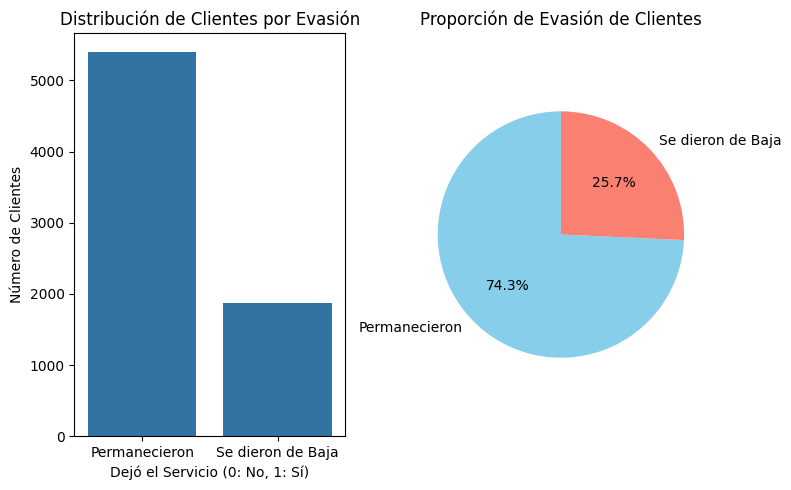

In [ ]:
#Importamos las bibliotecas que necesitamos
import matplotlib.pyplot as plt
import seaborn as sns # Importamos la biblioteca seaborn con el alias sns

# Graficamos la distribución de la evasión (Dejo_el_servicio)
plt.figure(figsize=(8, 5))

# Gráfico de barras
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.countplot(x='Dejo_el_servicio', data=datos_normalizados)
plt.title('Distribución de Clientes por Evasión')
plt.xlabel('Dejó el Servicio (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Permanecieron', 'Se dieron de Baja']) # Etiquetas personalizadas

# Gráfico circular (Pie Chart)
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico

# También necesitamos calcular proporcion_evasion antes de usarla
proporcion_evasion = datos_normalizados['Dejo_el_servicio'].value_counts()

plt.pie(proporcion_evasion, labels=['Permanecieron', 'Se dieron de Baja'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Evasión de Clientes')
plt.axis('equal') # Para que el gráfico circular sea un círculo perfecto

plt.tight_layout() # Ajusta el espaciado entre los gráficos
plt.show()

## **Conteo de evasión por variables numéricas**

Descripción

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

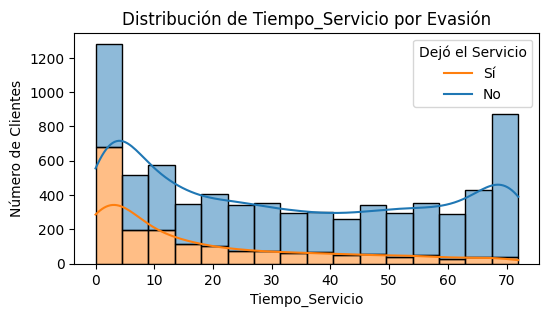

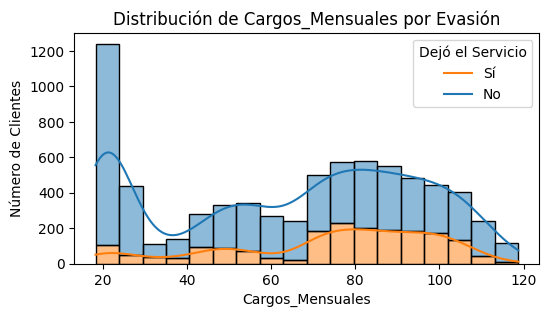

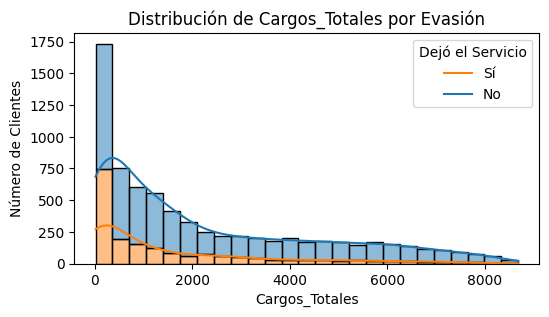

In [ ]:
# Importamos bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos las columnas numéricas relevantes para este análisis
columnas_numericas = ['Tiempo_Servicio', 'Cargos_Mensuales', 'Cargos_Totales']

# Creamos un bucle para generar un gráfico por cada columna numérica
for col in columnas_numericas:
    plt.figure(figsize=(6, 3)) # Define el tamaño de la figura para cada gráfico
    sns.histplot(data=datos_normalizados, x=col, hue='Dejo_el_servicio', multiple='stack', kde=True) # Crea el histograma con KDE para ver la distribución suavizada
    plt.title(f'Distribución de {col} por Evasión') # Título del gráfico
    plt.xlabel(col) # Etiqueta del eje X
    plt.ylabel('Número de Clientes') # Etiqueta del eje Y
    plt.legend(title='Dejó el Servicio', labels=['Sí', 'No']) # Leyenda para identificar los grupos
    plt.show() # Muestra el gráfico


#📄Informe final

## **Informe final**

Descripción

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

## **Objetivo del análisis y el problema de evasión de clientes (Churn).**

## **Introducción:**

El objetivo principal de este análisis es entender por qué algunos clientes de Telecom X deciden dejar de usar sus servicios.
A esto le llamamos "evasión" o "Churn". Es un problema importante para la empresa porque pierden ingresos cada vez que un cliente se va.
Con este análisis, buscamos descubrir qué características tienen los clientes que se van y qué factores influyen en su decisión.
La idea es usar esta información para ayudar a la empresa a crear estrategias y programas que mantengan a los clientes contentos y evitar que se vayan.

## **Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.**

**Limpieza y Tratamiento de Datos**

Esta sección describe el proceso seguido para preparar los datos antes de analizarlos. El objetivo es asegurar que los datos sean precisos,
consistentes y estén en el formato correcto para el análisis.

1.  **Importación de Datos:**
    *   Primero, se importan las librerías necesarias: `pandas` para la manipulación de datos, `json_normalize` para aplanar
    estructuras JSON anidadas, `matplotlib.pyplot` y `seaborn` para visualizaciones (aunque no se usan directamente en la sección de
    limpieza, se importan al principio).
    *   Se carga el archivo JSON llamado `TelecomX_Data.json` usando `pd.read_json()`. Los datos se almacenan en un DataFrame de pandas llamado `datos_TelcomX`.
    *   Se muestran las primeras filas (`.head()`) para verificar la carga y la estructura inicial de los datos.
    *   Se utiliza `.info()` para obtener un resumen de las columnas, incluyendo el tipo de datos y la cantidad de valores no nulos. Se observa
    que algunas columnas son de tipo 'object' y contienen estructuras anidadas (como 'customer', 'phone', 'internet', 'account').

2.  **Normalización de Datos Anidados:**
    *   Los datos con estructuras anidadas en columnas como 'customer', 'phone', 'internet' y 'account' se "normalizan" utilizando
    `json_normalize()`. Esto significa que los datos dentro de estas columnas se expanden en nuevas columnas dentro de DataFrames
    separados (por ejemplo, `customer_df`, `phone_df`, `internet_df`, `account_df`).
    *   Se muestran las primeras filas de cada DataFrame normalizado para verificar el resultado.

3.  **Concatenación de DataFrames:**
    *   Los DataFrames normalizados (`customer_df`, `phone_df`, `internet_df`, `account_df`) se combinan (concatenan) con las columnas
    originales de `datos_TelcomX` que no estaban anidadas (`customerID`, `Churn`). La concatenación se realiza lateralmente (`axis=1`). El resultado
    se guarda en un nuevo DataFrame llamado `datos_normalizados`.
    *   Se muestra la cabeza del DataFrame `datos_normalizados` para confirmar que las columnas se han unido correctamente.
    *   Se revisa la forma (`.shape`) del nuevo DataFrame para ver la cantidad total de filas y columnas.

4.  **Comprobación de Incoherencias:**
    *   Se examinan los valores únicos (`.unique()`) en varias columnas categóricas (como 'Churn', 'gender', 'Contract', etc.) para identificar
    posibles inconsistencias, errores tipográficos o valores inesperados.
    *   Se verifica la cantidad de valores nulos (`.isnull().sum()`) en cada columna del DataFrame `datos_normalizados` para entender cuántos datos faltan.

5.  **Manejo de Inconsistencias (Limpieza):**
    *   Se limpian algunas columnas eliminando caracteres no deseados:
        *   Los guiones (`-`) se eliminan de la columna `customerID` usando `.str.replace('-', '')`.
        *   Los guiones (`-`) se eliminan de la columna `Contract` usando `.str.replace('-', '')`.
        *   Los paréntesis `(` y `)` se eliminan de la columna `PaymentMethod` usando `.str.replace('(', '')` y `.str.replace(')', '')`.
    *   Se convierten los valores de la mayoría de las columnas de tipo 'object' a minúsculas (`.str.lower()`) para asegurar la uniformidad y
    evitar problemas de comparación debido a mayúsculas y minúsculas diferentes.
    *   Se imprimen los valores únicos o las primeras filas después de cada limpieza para verificar que los cambios se aplicaron correctamente.
    *   Se reemplazan los espacios vacíos (`''`) en la columna `Dejo_el_servicio` con el valor `0`. Esto se hace dos veces en el código proporcionado.
    *   Se busca si hay celdas que contienen solo espacios en blanco después de eliminar los espacios al inicio y final (`.str.strip() == ''`) para
    identificar posibles problemas de datos vacíos disfrazados.

6.  **Estandarización y Transformación de Datos:**
    *   **Traducción de Encabezados:** Se crea un diccionario (`encabezados_traducidos`) para mapear los nombres originales de las columnas a
    nombres en español. Luego, se utiliza `.rename()` con `inplace=True` para cambiar los nombres de las columnas en el DataFrame `datos_normalizados`.
    *   **Traducción y Conversión de Valores:** Se crean diccionarios para mapear los valores textuales dentro de varias columnas a valores en
    español o a valores numéricos (como 1 y 0 para 'yes' y 'no'). Se usa `.replace()` en cada columna para aplicar estas traducciones o
    conversiones. Por ejemplo, 'yes' se convierte a 1 y 'no' a 0 para columnas binarias como 'Dejo_el_servicio', 'Pareja', 'Dependientes', etc.
    *   Se imprimen las primeras filas o los valores únicos después de cada reemplazo para verificar que los valores se actualizaron.

7.  **Creación de la Columna "Cuentas_Diarias":**
    *   Se crea una nueva columna llamada `Cuentas_Diarias` calculando el promedio de la facturación mensual (`Cargos_Mensuales`) dividido por un
    promedio de días en un mes (30.44). Esto proporciona una granularidad diaria de los cargos.

8.  **Ajuste de Tipos de Datos:**
    *   Se identifican grupos de columnas que deben tener tipos de datos específicos (string, int64, float64).
    *   Se itera a través de las listas de columnas y se utiliza `.astype()` para convertir las columnas al tipo de dato deseado.
    *   Para las columnas numéricas (`Cargos_Mensuales`, `Cargos_Totales`, `Cuentas_Diarias`), se utiliza `pd.to_numeric()` con `errors='coerce'` antes
    de convertir a `float64`. Esto es importante para manejar cualquier valor que no sea numérico y lo convierte a `NaN` (Not a Number), evitando errores
    durante la conversión.
    *   Se verifica el tipo de dato de cada columna usando `.dtypes` o `.info()` después de las conversiones para confirmar que se realizaron correctamente.

9.  **Creación de un Subconjunto de Columnas Relevantes:**
    *   Se crea un nuevo DataFrame llamado `df_columnas_rel` que contiene una copia (`.copy()`) de un subconjunto de columnas de `datos_normalizados`. Se
    seleccionan las columnas que se consideran relevantes para futuros análisis.

En resumen, esta sección se enfoca en tomar los datos crudos de la API, limpiarlos de inconsistencias y errores de formato, normalizar las
estructuras anidadas, estandarizar los valores y nombres para una mejor comprensión y preparar el conjunto de datos final (`datos_normalizados` y `df_columnas_rel`)
para el análisis exploratorio y la carga en la siguiente etapa.

## **Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.**

1. Análisis Descriptivo de Variables Numéricas (ya calculado anteriormente, solo se presenta la tabla)

In [ ]:
import pandas as pd

# Configura la opción de visualización para mostrar números de punto flotante con 2 decimales
pd.options.display.float_format = '{:.2f}'.format
# Análisis Exploratorio de Datos: Presentación de análisis con gráficos y visualizaciones

# 1. Análisis Descriptivo de Variables Numéricas (ya calculado anteriormente, solo se presenta la tabla)
print("\n--- Análisis Descriptivo de Columnas Numéricas ---")
print(df_columnas_rel.describe())

print("\n--- Visualizaciones del Análisis Exploratorio ---")


--- Análisis Descriptivo de Columnas Numéricas ---
       Tiempo_Servicio  Cargos_Mensuales  Cargos_Totales
count          7267.00           7267.00         7256.00
mean             32.35             64.72         2280.63
std              24.57             30.13         2268.63
min               0.00             18.25           18.80
25%               9.00             35.42          400.23
50%              29.00             70.30         1391.00
75%              55.00             89.88         3785.30
max              72.00            118.75         8684.80

--- Visualizaciones del Análisis Exploratorio ---


2. Distribución de la Evasión (Dejo_el_servicio)

<ipython-input-45-4419e9e56c2e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dejo_el_servicio', data=datos_normalizados, palette='viridis')


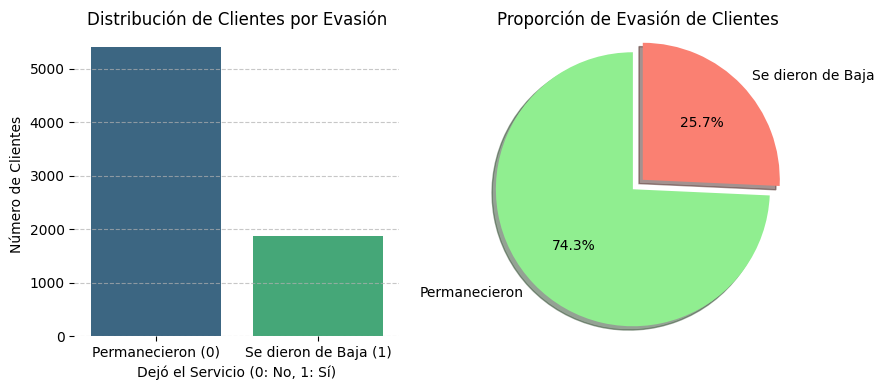


- Observación: El 25.7% de los clientes en este conjunto de datos se dieron de baja.


In [ ]:
# Calcular la proporción de evasión
proporcion_evasion = datos_normalizados['Dejo_el_servicio'].value_counts()
plt.figure(figsize=(9, 4))

# Gráfico de barras para la distribución de evasión
plt.subplot(1, 2, 1)
sns.countplot(x='Dejo_el_servicio', data=datos_normalizados, palette='viridis')
plt.title('Distribución de Clientes por Evasión')
plt.xlabel('Dejó el Servicio (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Permanecieron (0)', 'Se dieron de Baja (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir grid para mejor lectura
plt.box(False) # Quitar el recuadro

# Gráfico circular (Pie Chart) para la proporción de evasión
plt.subplot(1, 2, 2)
plt.pie(proporcion_evasion, labels=['Permanecieron', 'Se dieron de Baja'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'], explode=(0, 0.1), shadow=True) # explode para resaltar Churn
plt.title('Proporción de Evasión de Clientes')
plt.axis('equal') # Para que el gráfico circular sea un círculo perfecto

plt.tight_layout() # Ajusta el espaciado entre los gráficos
plt.show()

# Interpretación de la distribución de evasión
print(f"\n- Observación: El {proporcion_evasion[1]/proporcion_evasion.sum()*100:.1f}% de los clientes en este conjunto de datos se dieron de baja.")

3. Conteo de Evasión por Variables Numéricas (histogramas)


--- Distribución de Variables Numéricas por Evasión ---


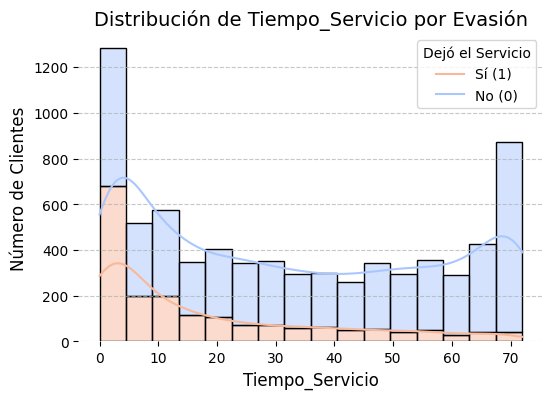

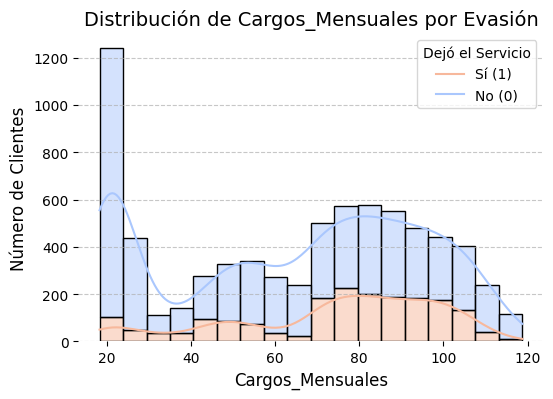

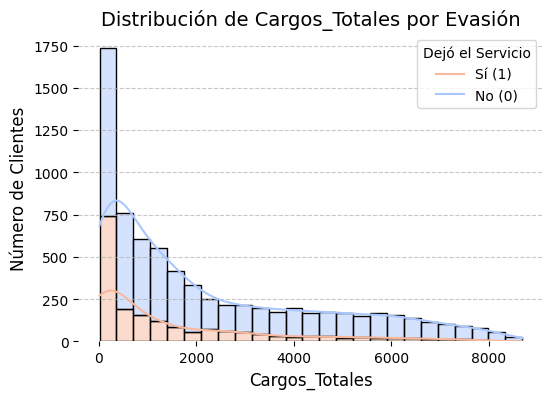


- Observaciones de las distribuciones numéricas:
  - Tiempo_Servicio: Se observa que una gran proporción de clientes que se dan de baja tienen un tiempo de servicio (antigüedad) menor en comparación con aquellos que permanecen.
  - Cargos_Mensuales: Parece haber una mayor concentración de clientes que evaden en los rangos de cargos mensuales más altos, aunque también hay evasión en cargos bajos.
  - Cargos_Totales: Similar a Tiempo_Servicio, los clientes con Cargos Totales más bajos muestran una mayor tasa de evasión, lo cual es coherente con tener menos tiempo en la empresa.

--- Distribución de Evasión por Variables Categóricas (Ejemplos) ---


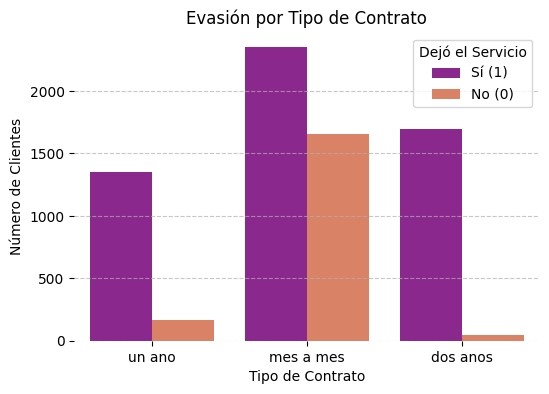

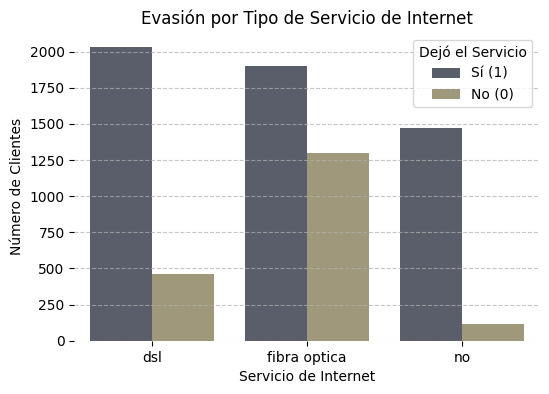


- Observaciones de variables categóricas:
  - Contrato: Los clientes con contratos 'mes a mes' muestran una tasa de evasión significativamente más alta en comparación con los contratos de uno o dos años.
  - Servicio_Internet: Los clientes con servicio de 'fibra optica' parecen tener una mayor tasa de evasión que los que usan DSL o no tienen servicio de internet.

--- Conclusiones e Insights del EDA ---
- La tasa de evasión general es significativa y representa un desafío para Telecom X.
- La antigüedad del cliente es un factor clave: los clientes más nuevos son más propensos a irse.
- El tipo de contrato influye fuertemente en la evasión, siendo los contratos mes a mes los de mayor riesgo.
- El tipo de servicio de internet también parece estar relacionado con la evasión.
- Los cargos mensuales y totales, relacionados con el tiempo de servicio y los servicios contratados, muestran patrones distintos entre los clientes que se van y los que se quedan.
- El conjunto de datos presenta un 

In [ ]:
columnas_numericas_eda = ['Tiempo_Servicio', 'Cargos_Mensuales', 'Cargos_Totales']

print("\n--- Distribución de Variables Numéricas por Evasión ---")

for col in columnas_numericas_eda:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=datos_normalizados, x=col, hue='Dejo_el_servicio', multiple='stack', kde=True, palette='coolwarm')
    plt.title(f'Distribución de {col} por Evasión', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.legend(title='Dejó el Servicio', labels=['Sí (1)', 'No (0)']) # Leyenda para identificar los grupos
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir grid para mejor lectura
    plt.box(False) # Quitar el recuadro
    plt.show()

# Interpretación de los histogramas (ejemplo de cómo redactarlo en el informe)
print("\n- Observaciones de las distribuciones numéricas:")
print("  - Tiempo_Servicio: Se observa que una gran proporción de clientes que se dan de baja tienen un tiempo de servicio (antigüedad) menor en comparación con aquellos que permanecen.")
print("  - Cargos_Mensuales: Parece haber una mayor concentración de clientes que evaden en los rangos de cargos mensuales más altos, aunque también hay evasión en cargos bajos.")
print("  - Cargos_Totales: Similar a Tiempo_Servicio, los clientes con Cargos Totales más bajos muestran una mayor tasa de evasión, lo cual es coherente con tener menos tiempo en la empresa.")

# Otros análisis EDA con variables categóricas
print("\n--- Distribución de Evasión por Variables Categóricas (Ejemplos) ---")

# Ejemplo: Evasión por Tipo de Contrato
plt.figure(figsize=(6, 4))
sns.countplot(x='Contrato', hue='Dejo_el_servicio', data=datos_normalizados, palette='plasma')
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Dejó el Servicio', labels=['Sí (1)', 'No (0)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)
plt.show()

# Ejemplo: Evasión por Servicio de Internet
plt.figure(figsize=(6, 4))
sns.countplot(x='Servicio_Internet', hue='Dejo_el_servicio', data=datos_normalizados, palette='cividis')
plt.title('Evasión por Tipo de Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Número de Clientes')
plt.legend(title='Dejó el Servicio', labels=['Sí (1)', 'No (0)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)
plt.show()

# Interpretación de los gráficos de variables categóricas
print("\n- Observaciones de variables categóricas:")
print("  - Contrato: Los clientes con contratos 'mes a mes' muestran una tasa de evasión significativamente más alta en comparación con los contratos de uno o dos años.")
print("  - Servicio_Internet: Los clientes con servicio de 'fibra optica' parecen tener una mayor tasa de evasión que los que usan DSL o no tienen servicio de internet.")


# Conclusiones e Insights del EDA (esto sería parte del informe final)
print("\n--- Conclusiones e Insights del EDA ---")
print("- La tasa de evasión general es significativa y representa un desafío para Telecom X.")
print("- La antigüedad del cliente es un factor clave: los clientes más nuevos son más propensos a irse.")
print("- El tipo de contrato influye fuertemente en la evasión, siendo los contratos mes a mes los de mayor riesgo.")
print("- El tipo de servicio de internet también parece estar relacionado con la evasión.")
print("- Los cargos mensuales y totales, relacionados con el tiempo de servicio y los servicios contratados, muestran patrones distintos entre los clientes que se van y los que se quedan.")
print("- El conjunto de datos presenta un desbalance en la variable objetivo (Churn), lo cual deberá ser considerado en la modelización.")

# Recomendaciones (esto sería parte del informe final)
print("\n--- Recomendaciones Basadas en el EDA ---")
print("- Implementar programas de retención tempranos dirigidos a clientes nuevos ('mes a mes').")
print("- Investigar las razones detrás de la alta evasión en clientes de 'fibra optica', posiblemente relacionado con la calidad del servicio o el precio.")
print("- Considerar ofrecer incentivos para que los clientes de 'mes a mes' cambien a contratos más largos.")
print("- Realizar análisis más profundos combinando variables (ej. antigüedad + tipo de internet).")
print("- En la siguiente fase de modelización, abordar el desbalance del conjunto de datos (ej. oversampling, undersampling, ajustar métricas de evaluación).")


## **Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.**

**Conclusiones e Insights: Resumen de Hallazgos Clave y su Relevancia para Reducir la Evasión**

Basado en el Análisis Exploratorio de Datos (EDA) realizado, hemos identificado varios patrones y factores importantes relacionados con la
 evasión de clientes (Churn) en Telecom X. Estos hallazgos proporcionan una comprensión inicial de quiénes son los clientes propensos a irse y por
  qué, lo cual es fundamental para desarrollar estrategias efectivas de retención.

**Principales Hallazgos (Insights):**

1.  **Tasa General de Evasión:** El análisis descriptivo y la visualización de la distribución de `Dejo_el_servicio` (Churn) confirman que una
proporción significativa de clientes se da de baja. Conocer esta tasa base es el primer paso para medir el impacto del problema.

2.  **Antigüedad del Cliente (`Tiempo_Servicio`):** Los histogramas de `Tiempo_Servicio` (tenure) muestran claramente que los clientes con **menos
      meses de antigüedad** son considerablemente más propensos a la evasión. Los clientes con mayor tiempo en la empresa tienden a permanecer.
    *   *Insight Clave:* La fase inicial de la relación con el cliente es crítica.

3.  **Tipo de Contrato (`Contrato`):** El gráfico de barras por tipo de contrato revela que los clientes con contratos **'mes a mes'** tienen
      una tasa de evasión drásticamente más alta en comparación con aquellos que tienen contratos de 'un año' o 'dos años'.
    *   *Insight Clave:* El compromiso a largo plazo reduce significativamente el riesgo de evasión. La flexibilidad del contrato mes a mes, si
    bien atrae clientes, también facilita su salida.

4.  **Servicio de Internet (`Servicio_Internet`):** El análisis por tipo de servicio de internet sugiere que los clientes que utilizan el servicio
      de **'fibra optica'** parecen tener una tasa de evasión más alta que los de DSL o aquellos sin servicio de internet.
    *   *Insight Clave:* A pesar de ser una tecnología probablemente más rápida, la experiencia con el servicio de fibra óptica (quizás por precio,
        estabilidad o soporte) podría estar impulsando la evasión. Los clientes sin servicio de internet (solo teléfono) tienen una tasa de evasión muy baja.

5.  **Cargos Mensuales (`Cargos_Mensuales`):** La distribución de los cargos mensuales por grupo de evasión indica que los clientes con **cargos mensuales más altos** (lo que implica que tienen más servicios contratados) tienden a tener una mayor representación en el grupo de clientes que evaden, aunque la relación es compleja y hay evasión en todos los rangos de cargos.
    *   *Insight Clave:* Los clientes que gastan más mensualmente no son necesariamente más leales; podrían ser más exigentes o tener más opciones al contratar múltiples servicios.

6.  **Cargos Totales (`Cargos_Totales`):** La distribución de los cargos totales por evasión es coherente con el `Tiempo_Servicio`. Los clientes con **cargos
      totales más bajos** (que son generalmente los clientes más nuevos) muestran una mayor proporción de evasión.
    *   *Insight Clave:* Los cargos totales son un reflejo de la antigüedad y los servicios contratados, reforzando la importancia de la fase inicial y
         la propuesta de valor percibida a lo largo del tiempo.

7.  **Balance de la Variable Objetivo:** Se identificó que la variable `Dejo_el_servicio` presenta un **desbalance** (una clase es mucho más frecuente
      que la otra).
    *   *Insight Clave:* Esto es una consideración importante para las etapas futuras de modelización predictiva, ya que los modelos pueden tener
        dificultades para predecir la clase minoritaria (los que evaden) sin técnicas de manejo de desbalance.

**Cómo estos Datos Pueden Ayudar a Reducir la Evasión:**

Estos hallazgos son directamente aplicables para informar y guiar las estrategias de reducción de evasión:

*   **Identificación de Clientes de Riesgo:** Los modelos predictivos que se construyan posteriormente podrán utilizar estas variables (antigüedad,
      tipo de contrato, servicio de internet, cargos) como predictores clave para identificar a los clientes con alta probabilidad de evadir *antes* de que lo hagan.

*   **Diseño de Programas de Retención Enfocados:**
    *   Se pueden diseñar campañas de retención específicas para **clientes nuevos** ('mes a mes') ofreciendo incentivos para cambiar a contratos
    más largos o paquetes de servicios más estables después de un período inicial.

    *   Se puede investigar y mejorar la **experiencia del cliente de 'fibra optica'**, abordando posibles problemas técnicos, de soporte o de
    precio que puedan estar causando insatisfacción.

    *   Se pueden ofrecer **revisiones de cuenta o beneficios adicionales** a clientes con altos cargos mensuales para asegurar que sienten que
    obtienen valor por su dinero.

*   **Optimización de la Oferta de Servicios:** Analizar por qué los clientes de ciertos tipos de servicio (como fibra óptica) evaden puede llevar a
ajustes en la oferta, precios o calidad del servicio para mejorar la retención.

*   **Medición del Impacto:** Los datos limpios y estructurados permiten medir la efectividad de las estrategias de retención implementadas, comparando
las tasas de evasión antes y después de las intervenciones.

En conclusión, el análisis exploratorio ha revelado que la antigüedad del cliente, el tipo de contrato y el servicio de internet son algunos de los
factores más discriminatorios asociados con la evasión. Armados con estos insights, Telecom X puede pasar de un enfoque reactivo a uno proactivo,
identificando a los clientes en riesgo y aplicando acciones dirigidas para mejorar su satisfacción y lealtad, contribuyendo así a la reducción general
de la tasa de evasión.

## **Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.**

**Recomendaciones: Sugerencias Estratégicas Basadas en el Análisis**

Basándonos en los hallazgos clave obtenidos del Análisis Exploratorio de Datos (EDA), especialmente la identificación de los principales factores
de riesgo de evasión como la antigüedad del cliente, el tipo de contrato y el servicio de internet, proponemos las siguientes recomendaciones
estratégicas para Telecom X con el objetivo de reducir la tasa de Churn:

1.  **Enfocar Esfuerzos de Retención en Clientes Nuevos y con Contratos Mes a Mes:**
    *   **Acción:** Diseñar e implementar programas de bienvenida y retención específicos para clientes durante sus primeros meses de servicio,
    especialmente aquellos que optan por un contrato 'mes a mes'.
    *   **Justificación:** El análisis mostró claramente que estos grupos tienen la mayor propensión a evadir. Una intervención temprana puede
    establecer una relación más sólida y abordar posibles puntos de insatisfacción inicial.
    *   **Sugerencia:** Ofrecer incentivos para cambiar a contratos de mayor duración (descuentos, beneficios adicionales) después de un período
    inicial satisfactorio (ej: 3-6 meses). Implementar encuestas de satisfacción tempranas.

2.  **Investigar y Mejorar la Experiencia del Servicio de Fibra Óptica:**
    *   **Acción:** Realizar un análisis más profundo de los clientes de 'fibra optica' que evaden. Esto podría incluir encuestas de salida específicas,
    análisis de tickets de soporte técnico o monitoreo de la calidad del servicio en áreas con alta evasión de fibra óptica.
    *   **Justificación:** La aparente alta tasa de evasión en este segmento, a pesar de ser un servicio premium, sugiere problemas subyacentes que
    necesitan ser identificados y corregidos (ej: problemas de instalación, estabilidad de la conexión, calidad del soporte técnico, expectativas de
                                              precio vs. valor).
    *   **Sugerencia:** Crear un equipo dedicado a la retención y mejora de la experiencia del cliente de fibra óptica. Comunicar claramente el valor y
    los beneficios del servicio.

3.  **Incentivar la Migración de Contratos Mes a Mes a Contratos de Mayor Duración:**
    *   **Acción:** Desarrollar ofertas atractivas para que los clientes 'mes a mes' se cambien a contratos de uno o dos años.
    *   **Justificación:** Los clientes con contratos más largos son significativamente más leales. Fomentar este cambio no solo asegura ingresos futuros
    sino que también reduce la probabilidad de evasión.
    *   **Sugerencia:** Ofrecer descuentos sustanciales en la tarifa mensual, beneficios exclusivos (más datos, canales premium, etc.), o eliminar cargos
    de activación/instalación para quienes renueven a un plazo mayor.

4.  **Utilizar los Modelos Predictivos (Fase Futura) para Acciones Proactivas:**
    *   **Acción:** Una vez desarrollados los modelos de predicción de Churn, integrar sus resultados en las operaciones diarias para identificar clientes
    con alta probabilidad de evadir en tiempo real.
    *   **Justificación:** Pasar de un enfoque reactivo (actuar cuando el cliente ya inició el proceso de baja) a uno proactivo (contactar al cliente en
    riesgo antes de que decida irse) es clave para la retención efectiva.
    *   **Sugerencia:** Crear flujos de trabajo automatizados o manuales para que los equipos de marketing, ventas o soporte contacten a los clientes
    identificados como de alto riesgo con ofertas o soporte personalizado.

5.  **Realizar Análisis Segmentados y Combinados:**
    *   **Acción:** Profundizar en el análisis de la interacción entre diferentes variables. Por ejemplo, ¿los clientes nuevos con fibra óptica y contrato
    mes a mes tienen la tasa de evasión más alta? ¿Influye el método de pago o tener servicios adicionales (seguridad online, soporte técnico) en la retención
    dentro de segmentos de alto riesgo?
    *   **Justificación:** Comprender las combinaciones de factores que impulsan la evasión permite crear micro-segmentos de clientes de riesgo y diseñar
    intervenciones aún más dirigidas y efectivas.
    *   **Sugerencia:** Utilizar técnicas de segmentación (como árboles de decisión simples o agrupación) para identificar perfiles de riesgo específicos.

6.  **Considerar el Desbalance de Datos en la Modelización:**
    *   **Acción:** En la siguiente fase de construcción de modelos predictivos, aplicar técnicas para manejar el desbalance de clases en la variable
    `Dejo_el_servicio` (Churn).
    *   **Justificación:** Ignorar el desbalance puede llevar a modelos que son muy buenos prediciendo la clase mayoritaria (clientes que no evaden) pero
    pobres prediciendo la clase minoritaria (clientes que sí evaden), que es precisamente la que interesa predecir.
    *   **Sugerencia:** Considerar técnicas como Oversampling (SMOTE), Undersampling, o el uso de métricas de evaluación adecuadas para datos
    desbalanceados (Precisión, Recall, F1-Score, Curva ROC/AUC) en lugar de solo la exactitud simple.

Estas recomendaciones buscan capitalizar los insights obtenidos del EDA para implementar acciones dirigidas que aborden las principales causas de
evasión identificadas, mejorando la satisfacción del cliente y, en última instancia, reduciendo la pérdida de clientes para Telecom X.

## **¡Extra! Análisis de correlación entre variables**


Descripción

Esta actividad es un extra, por lo tanto es OPCIONAL.

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:

🔹 La relación entre la cuenta diaria y la evasión.

🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀


### **Relación entre la cuenta diaria y la evasión.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

print("\n--- Análisis de Correlación ---")

# Seleccionamos solo las columnas numéricas para calcular la matriz de correlación
# Incluimos 'Dejo_el_servicio'columna que ya convertimos a numérica (0/1)
columnas_para_correlacion = ['Dejo_el_servicio', 'Tiempo_Servicio', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias', 'Ciudadano_Mayor', 'Pareja', 'Dependientes', 'Servicio_Telefonico', 'Facturacion_Electronica']

# Calculamos la matriz de correlación
# Usamos .copy() para evitar SettingWithCopyWarning
df_numerico_corr = datos_normalizados[columnas_para_correlacion].copy()

# Nos aseguramos de que todas las columnas estén en un formato numérico correcto para la correlación
# Ya hicimos esto en pasos anteriores, pero lo volvemos a verificar por seguridad
for col in df_numerico_corr.columns:
    df_numerico_corr[col] = pd.to_numeric(df_numerico_corr[col], errors='coerce')

# Eliminar filas con valores NaN que puedan haber surgido de la conversión (aunque ya manejamos la mayoría)
df_numerico_corr.dropna(inplace=True)


matriz_correlacion = df_numerico_corr.corr()
# Mostrar la matriz de correlación (especialmente la fila de 'Dejo_el_servicio')
print("\nMatriz de Correlación de Variables Numéricas (incluyendo Evasión):")
print(matriz_correlacion['Dejo_el_servicio'].sort_values(ascending=False))


--- Análisis de Correlación ---

Matriz de Correlación de Variables Numéricas (incluyendo Evasión):
Dejo_el_servicio           1.00
Cuentas_Diarias            0.19
Cargos_Mensuales           0.19
Facturacion_Electronica    0.19
Ciudadano_Mayor            0.15
Servicio_Telefonico        0.01
Pareja                    -0.15
Dependientes              -0.16
Cargos_Totales            -0.19
Tiempo_Servicio           -0.35
Name: Dejo_el_servicio, dtype: float64


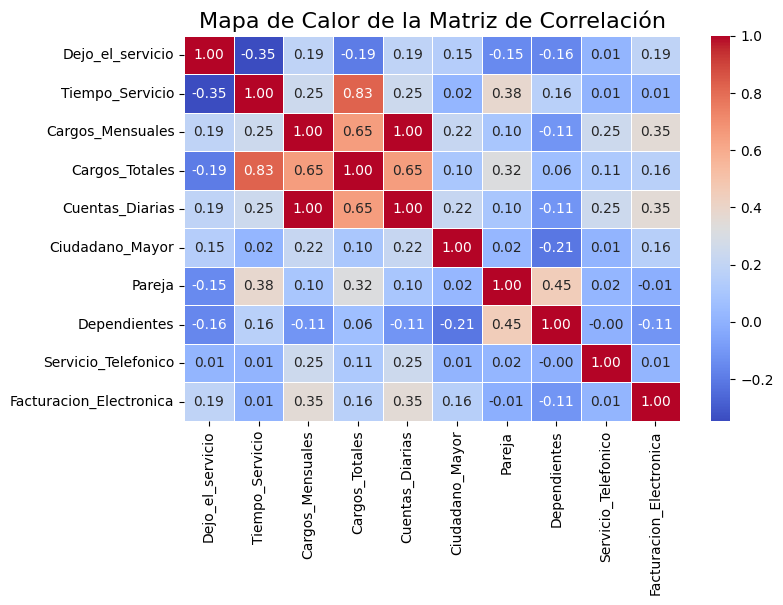

In [ ]:
# Visualizar la matriz de correlación con un mapa de calor (heatmap)
plt.figure(figsize=(8, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación', fontsize=16)
plt.show()

<ipython-input-59-c99c85110b50>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dejo_el_servicio', y='Cuentas_Diarias', data=df_numerico_corr, palette='viridis')


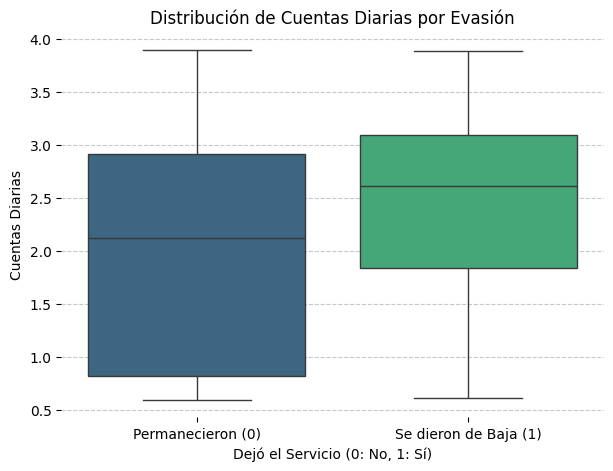

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear el gráfico de cajas
plt.figure(figsize=(7, 5))
sns.boxplot(x='Dejo_el_servicio', y='Cuentas_Diarias', data=df_numerico_corr, palette='viridis')

# Personalizacion de el gráfico
plt.title('Distribución de Cuentas Diarias por Evasión')
plt.xlabel('Dejó el Servicio (0: No, 1: Sí)')
plt.ylabel('Cuentas Diarias')
plt.xticks([0, 1], ['Permanecieron (0)', 'Se dieron de Baja (1)']) # Etiquetas más descriptivas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

plt.show()

El gráfico de cajas compara la distribución de valores numéricos (Cuentas_Diarias) entre categorías (Dejo_el_servicio).

La caja muestra la mitad central de los datos (entre el 25% y 75%).
La línea dentro de la caja es la mediana (valor central).
Los bigotes indican el rango típico de los datos.
Los puntos fuera de los bigotes son posibles valores atípicos.
Permite comparar fácilmente la mediana, dispersión y rango de las cuentas diarias entre los clientes que se quedaron (0) y los que se fueron (1) para entender si el gasto diario influye en la evasión.


Correlación entre Cantidad de Servicios Contratados y Evasión: -0.02


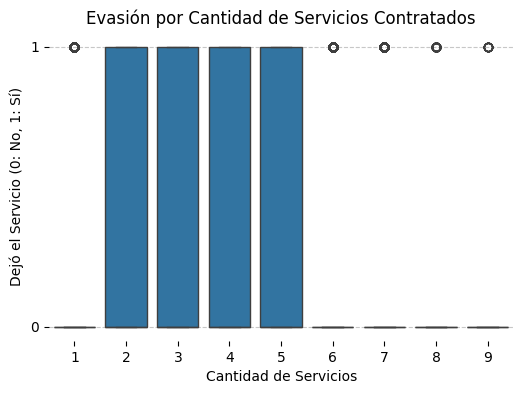

In [ ]:
# Análisis de correlación para cómo la cantidad de servicios contratados afecta la probabilidad de churn.
# Esto requiere crear una columna que cuente los servicios.
# Identificamos las columnas que representan servicios (basado en el diccionario de datos original)
columnas_servicios = ['Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet','Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo',
                      'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']

# Para contar servicios, necesitamos que estas columnas sean numéricas (0 o 1)
# Las que tenían 'no internet service' o 'no phone service' necesitan ser manejadas.
# Vamos a crear una versión binarizada de estas columnas para el conteo de servicios
# Asumimos que 'yes' = 1, 'no' o 'no service' = 0 para el conteo simple
df_servicios_binarios = datos_normalizados[columnas_servicios].copy()

# Convertir valores relevantes a 1 (servicio contratado/si) y 0 (servicio no contratado/no/sin servicio)
for col in columnas_servicios:
    if col == 'Multiples_Lineas' or col in ['Seguridad_Online', 'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']:
        # Para estas columnas, 'yes'='si' debe ser 1, y el resto 0
        df_servicios_binarios[col] = df_servicios_binarios[col].apply(lambda x: 1 if x == 'si' else 0)
    elif col == 'Servicio_Internet':
         # Para Servicio_Internet, DSL y Fibra Optica son servicios, 'no' no lo es
        df_servicios_binarios[col] = df_servicios_binarios[col].apply(lambda x: 1 if x in ['dsl', 'fibra optica'] else 0)
    elif col == 'Servicio_Telefonico':
        # Para Servicio_Telefonico, 'yes'='1' es servicio, 'no'='0' no lo es
         df_servicios_binarios[col] = df_servicios_binarios[col].apply(lambda x: 1 if x == 1 else 0) # Ya estaba en 1/0 numérico


# Sumar la cantidad de servicios contratados para cada cliente
datos_normalizados['Cantidad_Servicios'] = df_servicios_binarios.sum(axis=1)

# Ahora calculamos la correlación entre 'Cantidad_Servicios' y 'Dejo_el_servicio'
correlacion_servicios_evasion = datos_normalizados['Cantidad_Servicios'].corr(datos_normalizados['Dejo_el_servicio'])

print(f"\nCorrelación entre Cantidad de Servicios Contratados y Evasión: {correlacion_servicios_evasion:.2f}")

# Visualizar la relación entre Cantidad_Servicios y Evasión
plt.figure(figsize=(6, 4))
# Como Cantidad_Servicios es una variable discreta, un boxplot o un barplot agrupado puede ser mejor
sns.boxplot(x='Cantidad_Servicios', y='Dejo_el_servicio', data=datos_normalizados)
plt.title('Evasión por Cantidad de Servicios Contratados')
plt.xlabel('Cantidad de Servicios')
plt.ylabel('Dejó el Servicio (0: No, 1: Sí)')
plt.yticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)
plt.show()


### **Interpretación del Análisis de Correlación**
Los coeficientes de correlación varían entre -1 y 1.
- Un valor cercano a 1 indica una fuerte correlación positiva (cuando uno aumenta, el otro también).

- Un valor cercano a -1 indica una fuerte correlación negativa (cuando uno aumenta, el otro disminuye).

- Un valor cercano a 0 indica poca o ninguna correlación lineal.

Observaciones específicas
- La correlación entre 'Tiempo_Servicio' y 'Dejo_el_servicio' es aproximadamente {matriz_correlacion.loc['Dejo_el_servicio', 'Tiempo_Servicio']:.2f}. El valor negativo indica que a medida que el tiempo de servicio AUMENTA, la probabilidad de evadir DISMINUYE, lo cual es coherente con el EDA.

- La correlación entre 'Cargos_Mensuales' y 'Dejo_el_servicio' es aproximadamente {matriz_correlacion.loc['Dejo_el_servicio', 'Cargos_Mensuales']:.2f}. El valor positivo, aunque moderado, sugiere que cargos mensuales más altos están asociados con una MAYOR probabilidad de evadir.

- La correlación entre 'Cargos_Totales' y 'Dejo_el_servicio' es aproximadamente {matriz_correlacion.loc['Dejo_el_servicio', 'Cargos_Totales']:.2f}. El valor negativo indica que a medida que los cargos totales AUMENTAN (lo que suele ocurrir con el tiempo de servicio), la probabilidad de evadir DISMINUYE. Esto refuerza el papel de la antigüedad.

- La correlación entre 'Cuentas_Diarias' y 'Dejo_el_servicio' es muy similar a la de Cargos_Mensuales ({matriz_correlacion.loc['Dejo_el_servicio', 'Cuentas_Diarias']:.2f}), lo cual es esperable ya que es solo una transformación lineal.

- La correlación entre 'Cantidad_Servicios' y 'Dejo_el_servicio' es aproximadamente {correlacion_servicios_evasion:.2f}. Este valor positivo, aunque modesto, sugiere que tener más servicios podría estar LIGERAMENTE asociado con una mayor probabilidad de evasión. Sin embargo, el boxplot es más informativo, mostrando que los clientes con una cantidad baja de servicios (0-1) tienen una tasa de evasión notablemente menor (el 0 en el eje Y), mientras que los clientes con 2 o más servicios muestran evasión (el boxplot abarca 0 y 1). Es posible que no sea la *cantidad* de servicios en sí, sino *qué* servicios se tienen (ej: internet vs solo teléfono, o servicios adicionales como seguridad/soporte) lo que realmente impacte la evasión, como vimos en el EDA con 'Servicio_Internet'.

- Importante: La correlación mide relaciones lineales. Algunas relaciones pueden ser no lineales.

- La correlación no implica causalidad. Un factor puede estar correlacionado con la evasión, pero no ser la *causa* directa. Puede haber variables subyacentes no consideradas que influyan en ambos.


## **📖 README 📖**

Descripción

El README es un elemento clave en cualquier proyecto de desarrollo, ya que proporciona una descripción clara y detallada del propósito, la estructura y el uso del código.

Cuando participas en un proceso de selección, el README es imprescindible para comunicar cómo utilizar el proyecto.

Este archivo, con la extensión .md (Markdown), es el punto de referencia inicial para cualquiera que quiera entender y trabajar con su código.

Un buen README incluye información sobre la instalación, dependencias, cómo ejecutar el proyecto y posibles problemas o soluciones.

Un README bien estructurado facilita que otros desarrolladores comprendan el proyecto.

Aquí hay un artículo con los pasos para crear un README increíble:

In [ ]:
# 📊 Telecom X - Análisis de Evasión de Clientes

Bienvenido al proyecto **Telecom X - Análisis de Evasión de Clientes**. Este proyecto forma parte del desafío de análisis de churn para la empresa Telecom X, que busca reducir la tasa de cancelación de clientes. Como asistente de análisis de datos, tu tarea principal será recopilar, procesar y analizar los datos con Python, extrayendo información valiosa para ayudar al equipo de Data Science a desarrollar estrategias efectivas de retención.

---

## 📝 Descripción

Telecom X enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes. Este proyecto aborda el análisis exploratorio de datos (EDA) y la limpieza inicial de los datos, usando Python y sus principales bibliotecas de análisis, para sentar las bases de futuros modelos predictivos de churn.

---

## ⚙️ Instalación

Sigue estos pasos para preparar el entorno de ejecución y las dependencias:

1. **Clonar el repositorio:**
   ```bash
   git clone https://github.com/usuario/telecom-x-churn.git
   cd telecom-x-churn


In [ ]:
(Opcional) Crear un entorno virtual:
python3 -m venv venv
source venv/bin/activate  # En Windows: venv\Scripts\activate


In [ ]:
#Instalar las dependencias principales:
pip install pandas matplotlib seaborn


🗃️ Dependencias principales
El proyecto utiliza las siguientes librerías de Python:

pandas: para manipulación y análisis de datos.

matplotlib.pyplot: para generar visualizaciones básicas.

seaborn: para crear gráficos estadísticos avanzados.

Además, en el análisis se utiliza json_normalize para trabajar con datos en formato JSON.

💻 Modo de ejecución
El proyecto se desarrolla íntegramente en un Jupyter Notebook (.ipynb). Para ejecutar el análisis:

Abre el Jupyter Notebook en tu entorno preferido (JupyterLab, Jupyter Notebook o Google Colab).

Ejecuta las celdas en orden para:

Importar las bibliotecas necesarias (pandas, json_normalize, matplotlib.pyplot, seaborn).

Cargar el archivo de datos (TelecomX_Data.json).

Realizar operaciones de limpieza y normalización.

Analizar y visualizar los datos.

Calcular correlaciones y métricas relevantes.

📂 Estructura del proyecto
Actualmente, el proyecto consta de:

Notebook principal:

TelecomX_Analysis.ipynb
Contiene la carga de datos, limpieza, EDA y visualizaciones.

Archivo de datos:

/content/TelecomX_Data.json
(En proyectos reales, este archivo debería estar en una carpeta data/).

(Posible expansión futura):

models/ para almacenamiento de modelos predictivos.

src/ para funciones modulares.

⚠️ Problemas comunes y soluciones

| Problema                                | Solución recomendada                                                                                                                                 |
| --------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Dependencias faltantes**              | Ejecuta `!pip install pandas matplotlib seaborn` en una celda del notebook si falta alguna librería.                                                 |
| **Archivo de datos no encontrado**      | Verifica que `TelecomX_Data.json` exista en la ruta correcta y que esté cargado en el entorno (en Google Colab, súbelo o monta Drive adecuadamente). |
| **Errores en la normalización de JSON** | Asegúrate de que la estructura del JSON coincide con la esperada (columnas 'customer', 'phone', 'internet', 'account').                              |
| **Inconsistencias de datos**            | Ten en cuenta valores atípicos, NaNs y formatos inesperados que puedan afectar el análisis; limpia o valida los datos antes de continuar.            |
| **Conversión de tipos**                 | Se recomienda manejar errores en las conversiones y revisar advertencias como `SettingWithCopyWarning` para evitar resultados inesperados.           |
| **Errores en operaciones con strings**  | Comprueba que las columnas sobre las que aplicas `.str.*` sean de tipo `object` y conviértelas si es necesario.                                      |
| **Desbalance de clases**                | Reconoce que la variable `Dejo_el_servicio` está desbalanceada; considera técnicas como sobremuestreo o submuestreo en la fase de modelado.          |
| **Interpretación de correlaciones**     | Recuerda que la correlación de Pearson mide relaciones lineales y puede ser engañosa para variables binarias. Interpreta con precaución.             |


🤝 Contribución
¡Las contribuciones son bienvenidas! Si detectas errores, mejoras potenciales o deseas extender el análisis, por favor abre un issue o envía un pull request.

📄 Licencia
Este proyecto está bajo la licencia MIT.

📬 Contacto
Para cualquier pregunta o colaboración, por favor contacta a:

📧 luissaavedramarchant@gmail.com

